From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives. Raw geographic data like latitudes and longitudes are difficult to understand using the data charts 

To explore this kind of data, we'll need to learn how to visualize the data on maps

We'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. 

We'll be working with flight data from the [openflights website](https://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

* airlines.csv - data on each airline.

  * country - where the airline is headquartered.
  * active - if the airline is still active.
  
* airports.csv - data on each airport.

  * name - name of the airport.
  * city - city the airport is located.
  * country - country the airport is located.
  * code - unique airport code.
  * latitude - latitude value.
  * longitude - longitude value.
 
* routes.csv - data on each flight route.

  * airline - airline for the route.
  * source - starting city for the route.
  * dest - destination city for the route.

# Tasks
1. For each airport, which destination airport is the most common?
2. Which cities are the most important hubs for airports and airlines?

In [22]:
import pandas as pd

airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")
print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])
print(airports.info())

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
id           8107 non-null in

We have to answer the following question

1. What's the best way to link the data from these 3 different datasets together?

2. What are the formats of the latitude and longitude values?

A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

Latitude describe North to South Position ranges from -90 to 90

Longitude describe East to West postion ranges from -180 to 180 

In most cases, we want to visualize latitude and longitude points on two-dimensional maps. Two-dimensional maps are faster to render, easier to view on a computer and distribute, and are more familiar to the experience of popular mapping software like Google Maps. Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system (its an x & y coordiantes) using a map projection.

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). We'll use the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection), because it is commonly used by popular mapping software.

Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the [basemap toolkit](https://matplotlib.org/basemap/). Basemap is an extension to Matplotlib that makes it easier to work with geographic data. [The documentation for basemap](https://matplotlib.org/basemap/users/intro.html) provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on its own, but provides the facilities to transform coordinates to one of 25 different map projections.

Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly.

The easiest way to install basemap is through Anaconda. 

conda install basemap

If the above code does not work for you, you can install Basemap through the Linux command line using the following code:

conda install -c conda-forge basemap


Here's what the general workflow will look like when working with two-dimensional maps:

Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
Convert spherical coordinates to Cartesian coordinates using the basemap instance.
Use the matplotlib and basemap methods to customize the map.
Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the basemap constructor and pass in values for the required parameters:

* projection: the map projection.
* llcrnrlat: latitude of lower left hand corner of the desired map domain
* urcrnrlat: latitude of upper right hand corner of the desired map domain
* llcrnrlon: longitude of lower left hand corner of the desired map domain
* urcrnrlon: longitude of upper right hand corner of the desired map domain

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [7]:
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
print(m)

As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use Series.tolist() to convert the longitude and latitude columns from the airports dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:

x, y = m(longitudes, latitudes)

The basemap object will return 2 list objects, which we assign to x and y

In [9]:
airports["longitude"].describe()

count    8107.000000
mean       -3.921969
std        85.900873
min      -179.877000
25%       -79.022498
50%         5.292028
75%        49.785821
max       179.951000
Name: longitude, dtype: float64

In [11]:
airports["latitude"].describe()

count    8107.000000
mean       26.817720
std        27.866953
min       -89.999997
25%         8.824928
50%        34.987800
75%        47.957599
max        82.517778
Name: latitude, dtype: float64

In [21]:
x,y = m((airports["longitude"].tolist()), (airports["latitude"].tolist()))
# print(x)

Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of x and y coordinates, we use the basemap.scatter() method.

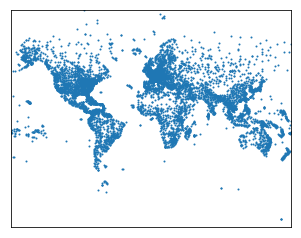

In [27]:
m.scatter(x,y,s = 1) # s represent marker size
plt.show()

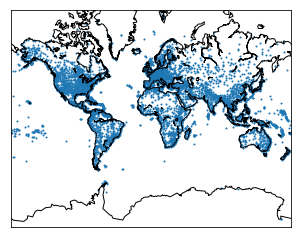

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
x,y = m(airports["longitude"].tolist(), airports["latitude"].tolist())
m.scatter(x,y,s=1)
m.drawcoastlines() # display the coast lines (outlines of the coasts for each continent)
plt.show()

Because basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly to customize the appearance of the map.

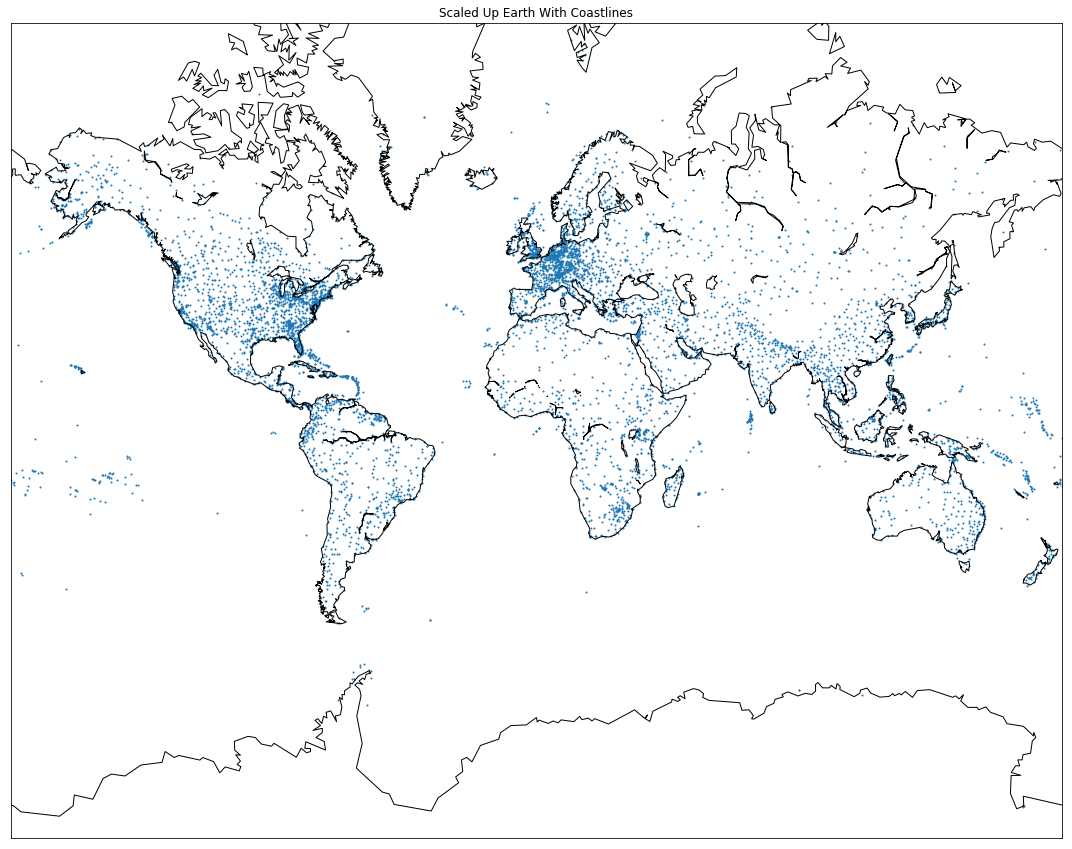

In [39]:
fig, ax = plt.subplots(figsize = (20,15))
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
x,y = m(airports["longitude"].tolist(), airports["latitude"].tolist())
m.scatter(x,y,s=1)
m.drawcoastlines() 
plt.show()

To better understand the flight routes, we can draw **great circles** to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection.

To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. 

In [41]:
geo_routes = pd.read_csv("geo_routes.csv")
print(geo_routes.info())
print(geo_routes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order:

lon1 - longitude of the starting point.

lat1 - latitude of the starting point.

lon2 - longitude of the ending point.

lat2 - latitude of the ending point.

Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the basemap.drawgreatcircle() method isn't able to create great circles properly when they go outside of the map boundaries. 

Note: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.

In [76]:
def create_great_circles(df):
    for index, row in df.iterrows():
        end_lon, start_lon = row["end_lon"], row["start_lon"]
        end_lat, start_lat = row["end_lat"],row["start_lat"]
        if abs(end_lon-start_lon) < 180:
            if abs(end_lat-start_lat) < 180:
            
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
    

In [77]:
# dataframe containing just the routes that start at the DFW airport
dfw = geo_routes[geo_routes["source"] == "DFW"]

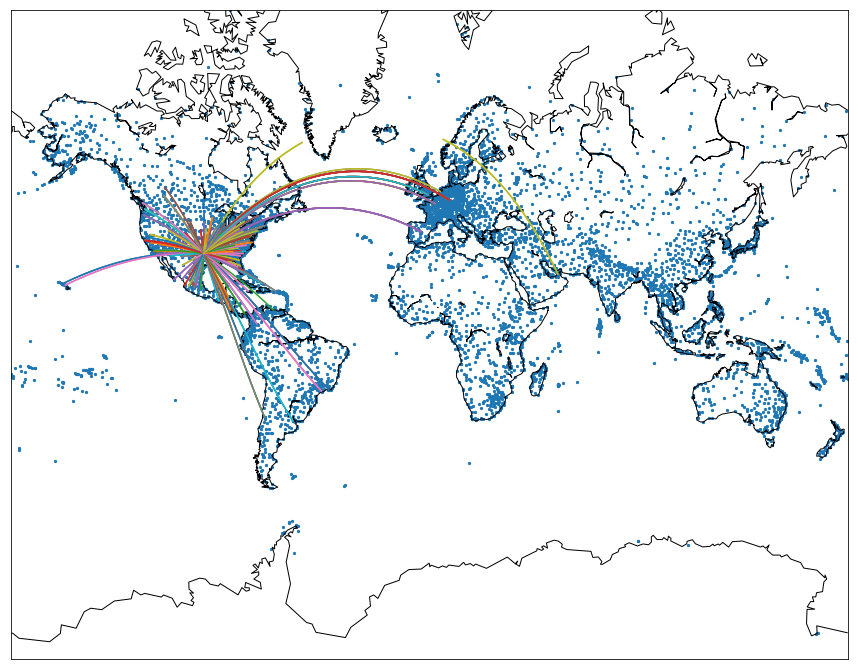

In [80]:
fig, ax = plt.subplots(figsize = (15,20))
m = Basemap(projection="merc",llcrnrlon = -180, urcrnrlon = 180, llcrnrlat = -80, urcrnrlat = 80)
x,y = m(airports["longitude"].tolist(), airports["latitude"].tolist())
m.scatter(x,y, s = 5)
m.drawcoastlines()
create_great_circles(dfw)
plt.show()

In [1]:
# for index, row in geo_routes.iterrows():
#     print(index, row)